In [17]:
#importamos las librerias
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [19]:
# Importar el dataset de cosmeticos
df = pd.read_csv('cosmetics.csv')
print(df.head())

         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

   Price  Rank                                        Ingredients  \
0    175   4.1  Algae (Seaweed) Extract, Mineral Oil, Petrolat...   
1    179   4.1  Galactomyces Ferment Filtrate (Pitera), Butyle...   
2     68   4.4  Water, Dicaprylyl Carbonate, Glycerin, Ceteary...   
3    175   3.8  Algae (Seaweed) Extract, Cyclopentasiloxane, P...   
4     38   4.1  Water, Snail Secretion Filtrate, Phenyl Trimet...   

   Combination  Dry  Normal  Oily  Sensitive  
0            1    1       1     1          1  
1   

In [27]:
#Utilizamos el comando de pandas dropna() para hacer limpieza del dataset, eliminando los valores faltantes
df_new = df.dropna()
df_new.shape

(1472, 12)

Luego de limpiar los datos nos damos cuenta que, no tenia valores faltantes, pues despues de "limpiarla", el datset sigue teniendo el mismo tamaño, es decir las mismas filas que el dataset original.

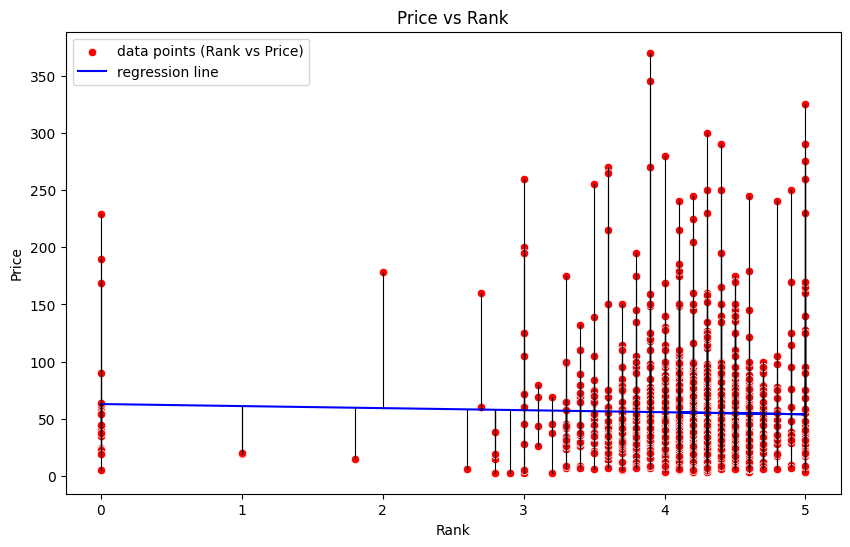

In [31]:
# Crear el gráfico de dispersión con puntos de datos en rojo que permita analizar el precio con respecto a la clasificación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Price', data=df, color='red', label='data points (Rank vs Price)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df['Rank'], df['Price'], 1)
plt.plot(df['Rank'], slope * df['Rank'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df.iterrows():
    x = row['Rank']
    y_actual = row['Price']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Rank')
plt.ylabel('Price')
plt.title('Price vs Rank')
plt.legend()

# Mostrar el gráfico
plt.show()